# GFTT
- Used to detect corners
- Good features to track detector(GFTT).
- Refer [paper](https://gurus.pyimagesearch.com/wp-content/uploads/2015/06/shi_1994.pdf)
- Extension of Harris keypoint detector.
- In Harris keypoint detector, we try to determine:
$$
R = det(M) - k(trace(M))^{2}
$$
which can be broken down to:
$$
R = \lambda_{1}\lambda_{2} - k(\lambda_{1} + \lambda_{2})^{2}
$$
- The authors of GFTT suggested the following calculation of R to indicate whether or not region is a corner
$$
R = min(\lambda_{1}, \lambda_{2})
$$
- In this case, we are simply taking the minimum value of the eigenvalue decomposition components. If this value R is greater than our threshold T (i.e. $R >= T$), then we can mark the region as a corner.
<img src="../../images/embedded_images/shi_thomas.jpg" alt="Drawing" style="width: 300px;"/>
- In regions #1, both $\lambda_1$ and $\lambda_2$ are $<T$, thus region is not a keypoint
- In Region #2, $\lambda_{1}$ is $< T$, so again, we cannot mark the region as a keypoint.
- Similarity, in Region #3, $\lambda_{2}$ is $< T$, so the region cannot be marked as a keypoint.
- Finally, when both $\lambda_{1} > T$ and $\lambda_{2} > T$, we can mark the region as a corner keypoint in Region #4.

In [1]:
import sys
sys.path.append("../../")

In [2]:
import cv2
import numpy as np
import imutils
from cv_imshow import display_image, create_subplot

In [6]:
args = {
    "image": "../../images/fast_book_cover.png",
    "pen": "../../images/keypoint_detect/pen.jpg"
}

In [3]:
def gftt(gray, maxCorners, qualityLevel, minDistance, mask, blockSize, 
         useHarrisDetector, k):
    
    #compute gftt keypoints using parameters
    kps = cv2.goodFeaturesToTrack(gray, maxCorners, qualityLevel,
                                 minDistance, mask=mask, blockSize=blockSize,
                                 useHarrisDetector=useHarrisDetector, k=k)
    
    #create and return keypoints
    return [cv2.KeyPoint(pt[0][0], pt[0][1],3) for pt in kps]

In [5]:
def keypoint_detector(imagePath, maxCorners=0, qualityLevel=0.01, minDistance=1,
        mask=None, blockSize=3, useHarrisDetector=False, k=0.04):
    
    #read image, and convert to gray
    image = cv2.imread(imagePath)
    orig = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #use gftt
    kps = gftt(gray)
    
    for kp in kps:
        r = int(0.5*kp.size)
        (x,y) = np.int0(kp.pt)
        cv2.circle(image, (x,y), r, (0,255,255), 2)
        
    display_image("Images", np.hstack([orig, image]))

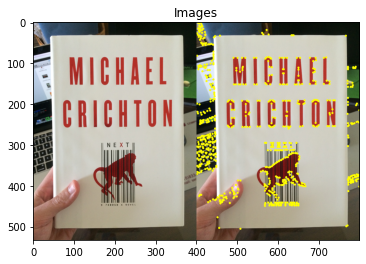

In [7]:
keypoint_detector(args["image"])

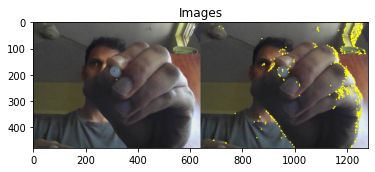

In [8]:
keypoint_detector(args["pen"])